<a href="https://colab.research.google.com/github/jajapuramshivasai/Advanced-Experimental-Techniques-in-Quantum-Materials/blob/main/R_vs_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

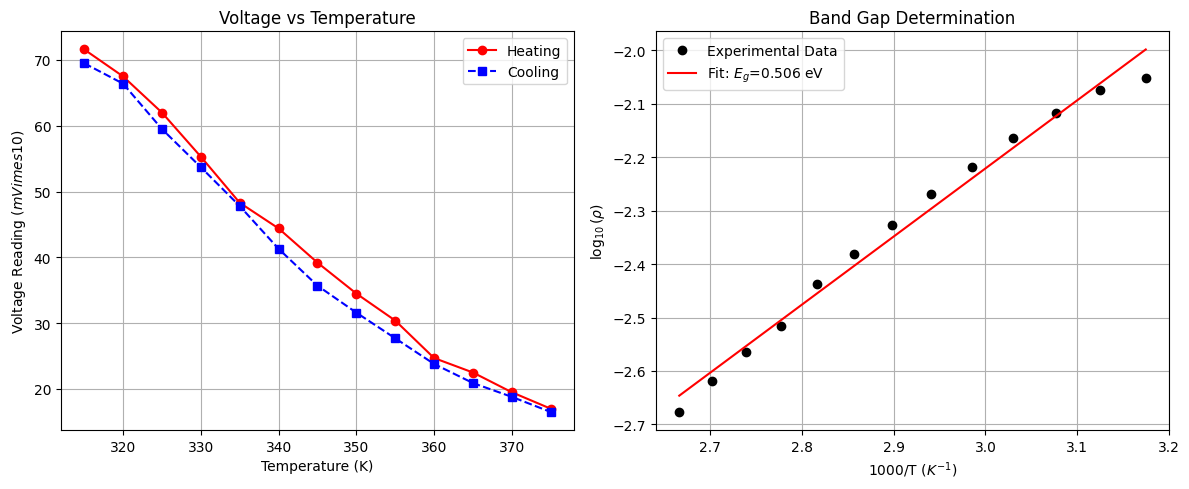

Calculated Energy Band Gap (Eg): 0.5062 eV


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- 1. Experimental Data ---
temp_k = np.array([315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375])
v_up = np.array([71.6, 67.5, 62.0, 55.3, 48.3, 44.4, 39.2, 34.5, 30.4, 24.7, 22.5, 19.5, 17.0])
v_down = np.array([69.5, 66.4, 59.5, 53.7, 47.8, 41.3, 35.7, 31.6, 27.7, 23.8, 20.9, 18.8, 16.5])

# --- 2. Constants & Physics Parameters ---
I = 0.010       # Constant Current (10 mA)
S = 0.002       # Probe Spacing (2 mm)
k = 8.617e-5    # Boltzmann Constant (eV/K)

def calc_rho(v_reading):
    # V_actual = (Reading / 10) * 10^-3 Volts
    v_volts = (v_reading / 10.0) * 1e-3
    return (v_volts / I) * 2 * np.pi * S

# Calculate Resistivity (rho)
rho_up = calc_rho(v_up)
rho_down = calc_rho(v_down)
rho_avg = (rho_up + rho_down) / 2

# Calculations for Arrhenius Plot
inv_t = 1000.0 / temp_k  # 1000/T
ln_rho = np.log(rho_avg)

# --- 3. Linear Regression for Band Gap (Eg) ---
# Formula: ln(rho) = constant + Eg / (2kT)
# Slope (m) of ln(rho) vs 1000/T is: m = Eg / (2 * k * 1000)
slope, intercept, _, _, _ = linregress(inv_t, ln_rho)
Eg = slope * 2 * k * 1000

# --- 4. Plotting ---
plt.figure(figsize=(12, 5))

# Plot 1: Voltage vs Temperature
plt.subplot(1, 2, 1)
plt.plot(temp_k, v_up, 'ro-', label='Heating')
plt.plot(temp_k, v_down, 'bs--', label='Cooling')
plt.xlabel('Temperature (K)')
plt.ylabel('Voltage Reading ($mV \times 10$)')
plt.title('Voltage vs Temperature')
plt.legend(); plt.grid(True)
plt.savefig('voltage_vs_temperature.png') # Save the plot

# Plot 2: Arrhenius Plot
plt.subplot(1, 2, 2)
plt.plot(inv_t, np.log10(rho_avg), 'ko', label='Experimental Data')
plt.plot(inv_t, slope*inv_t/2.303 + intercept/2.303, 'r-', label=f'Fit: $E_g$={Eg:.3f} eV')
plt.xlabel('1000/T ($K^{-1}$)')
plt.ylabel('$\\log_{10}(\\rho)$')
plt.title('Band Gap Determination')
plt.legend(); plt.grid(True)
plt.savefig('arrhenius_plot.png') # Save the plot

plt.tight_layout()
plt.show()

print(f"Calculated Energy Band Gap (Eg): {Eg:.4f} eV")